# **Project Title : Customer Churn Prediction for a Telecom Company**

### Import Data

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('customerchurn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(7043, 21)

In [16]:
for i in df:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [17]:
df.replace({'No phone service':'No','No internet service':'No'},inplace=True)

In [18]:
df['TotalCharges'].replace({' ':0},inplace=True)

In [19]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x : float(x))

### EDA(Exploratory Data Analysis)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

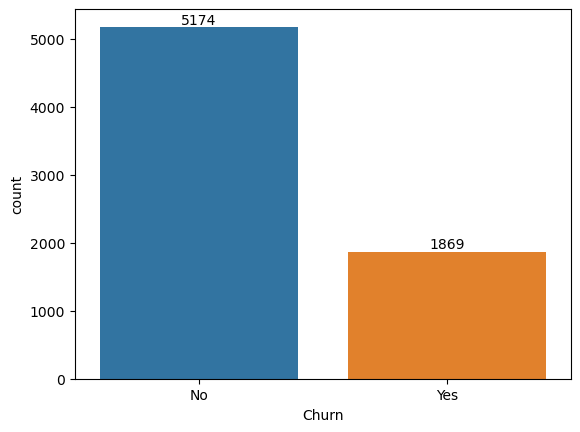

In [23]:
a = sns.countplot(data=df,x='Churn')
for i in a.containers:
    a.bar_label(i)

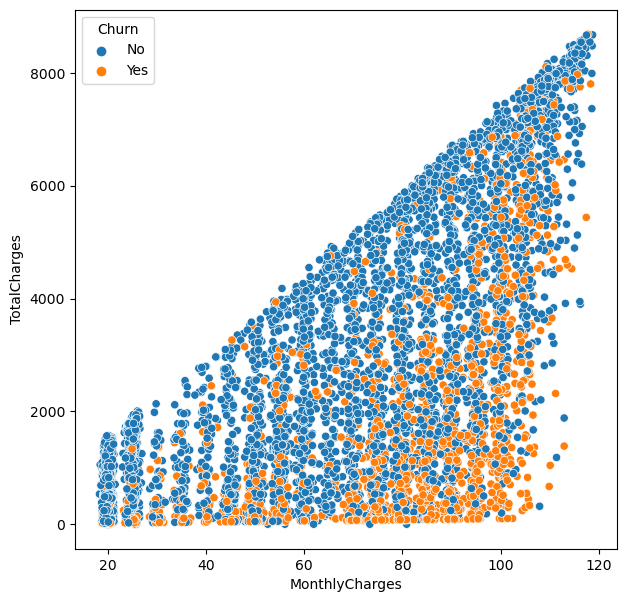

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn')
plt.show()

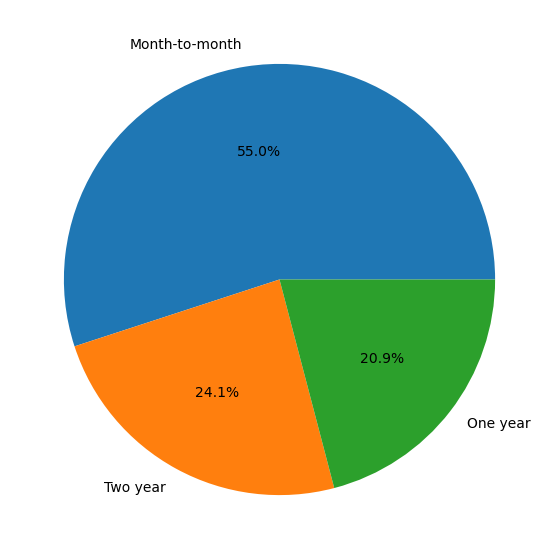

In [25]:
contract_counts=df['Contract'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(contract_counts,labels=contract_counts.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

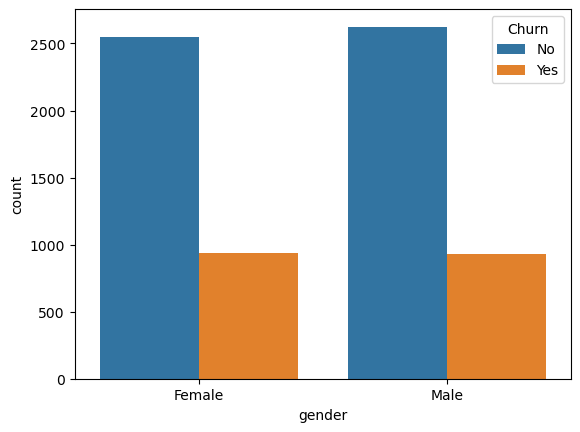

In [26]:
sns.countplot(data=df,x='gender',hue='Churn')

### Feature Engineering

In [28]:
for i in df:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [29]:
df.replace({'Female':0, 'Male':1,'Yes':1, 'No':0,'DSL':1, 'Fiber optic':2, 'No':0,'Month-to-month':0, 'One year':1, 'Two year':2,'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
 'Credit card (automatic)':3},inplace = True)

In [30]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [31]:
df['customerID'] = df['customerID'].apply(lambda x : int(x.split('-')[0]))

In [32]:
x = df.drop(['customerID','Churn'],axis=1)

In [33]:
y = df.Churn

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE()

In [36]:
x,y=sm.fit_resample(x,y)

In [37]:
x.shape

(10348, 19)

In [38]:
y.shape

(10348,)

In [39]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

### Data Splitting

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [43]:
x_train.shape

(8278, 19)

In [44]:
x_test.shape

(2070, 19)

### Model Selection

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [47]:
Lr = LogisticRegression()
sv = SVC()

### Model Training

In [109]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [111]:
sv.fit(x_train,y_train)

SVC()

In [113]:
print('Logistic regression:',Lr.score(x_test,y_test))
print('SVC:',sv.score(x_test,y_test))

Logistic regression: 0.8144927536231884
SVC: 0.6536231884057971


In [115]:
y_pred =Lr.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

#### Logistic Regression is best accuracy than svc

In [118]:
from sklearn.metrics import confusion_matrix

In [120]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

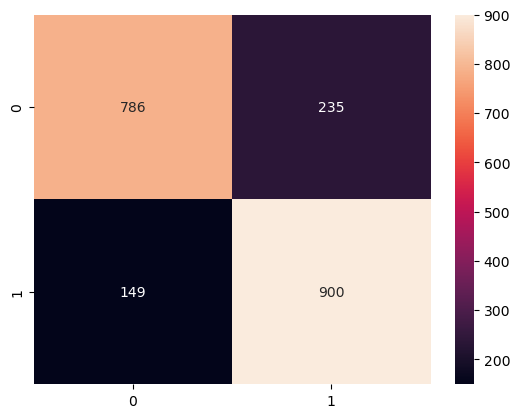

In [122]:
sns.heatmap(cm,annot=True,fmt='d')

### Model Evaluation

In [125]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1021
           1       0.79      0.86      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070

